## Objective
Statistical Analysis of Business Data. Explore the dataset and extract insights from the data.

1. Explore the dataset and extract insights using Exploratory Data Analysis.
2. Prove (or disprove) that the medical claims made by the people who smoke is greater than those who don't?
3. Prove (or disprove) with statistical evidence that the BMI of females is different from that of males.
4. Is the proportion of smokers significantly different across different regions?
5. Is the mean BMI of women with no children, one child, and two children the same? Explain your answer with statistical evidence.

* Consider a significance level of 0.05 for all tests.

## Data
1. Age - This is an integer indicating the age of the primary beneficiary (excluding those above 64 years, since they are generally covered by the government).
2. Sex - This is the policy holder's gender, either male or female.
3. BMI - This is the body mass index (BMI), which provides a sense of how over or under-weight a person is relative to their height. BMI is equal to weight (in kilograms) divided by height (in meters) squared. An ideal BMI is within the range of 18.5 to 24.9.
4. Children - This is an integer indicating the number of children / dependents covered by the insurance plan.
5. Smoker - This is yes or no depending on whether the insured regularly smokes tobacco.
6. Region - This is the beneficiary's place of residence in the U.S., divided into four geographic regions - northeast, southeast, southwest, or northwest.
7. Charges​ - Individual medical costs billed to health insurance

### Importing necessary packages

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
from statsmodels.stats.proportion import proportions_ztest # For proportion Z-test
from statsmodels.formula.api import ols      # For n-way ANOVA
from statsmodels.stats.anova import anova_lm # For n-way ANOVA
from   scipy.stats import chi2_contingency   # For Chi-Sq 
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

### Read dataset

In [2]:
insurance = pd.read_csv("AxisInsurance.csv")
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


### Checking first and last 5 rows of the data

In [3]:
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
insurance.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


### Check shape and data types and fixing the data types for Data Analysis

In [5]:
insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [6]:
insurance.shape

(1338, 7)

* Converting sex, smoker and region columns to category
* Children column is the number of children/dependents for the customer. This can be used as category.

In [7]:
insurance["sex"] = insurance.sex.astype("category")
insurance["smoker"] = insurance.smoker.astype("category")
insurance["region"] = insurance.region.astype("category")
insurance["children"] = insurance.children.astype("category")

In [8]:
insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   age       1338 non-null   int64   
 1   sex       1338 non-null   category
 2   bmi       1338 non-null   float64 
 3   children  1338 non-null   category
 4   smoker    1338 non-null   category
 5   region    1338 non-null   category
 6   charges   1338 non-null   float64 
dtypes: category(4), float64(2), int64(1)
memory usage: 37.3 KB


- Memory usage has been reduced when object data type columns are converted to category as category occupies less memory storage

In [9]:
insurance.describe(include =["int64","float64"])

,age,bmi,charges
count,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,13270.422265
std,14.049960,6.098187,12110.011237
min,18.000000,15.960000,1121.873900
25%,27.000000,26.296250,4740.287150
50%,39.000000,30.400000,9382.033000
75%,51.000000,34.693750,16639.912515
max,64.000000,53.130000,63770.428010


- Average age in the given dataset is 39
- Medical charges billed to insurance is more spread out as standard deviation is higher
- Medical charges is highly right skewed as mean is greater than median

In [109]:
insurance.describe(include = "category")

,sex,children,smoker,region
count,1338,1338,1338,1338
unique,2,6,2,4
top,male,0,no,southeast
freq,676,574,1064,364


- There are 364 customers from southeast region which is highest.
- There are more male customers(676) when compared to females
- Majority of customers in the dataset are non smokers(1064) compared to smokers (274)

### Checking for missing values

In [82]:
insurance.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

- There are no missing values in the sample provided

## Exploratory Data Analysis
### Univariate Analysis

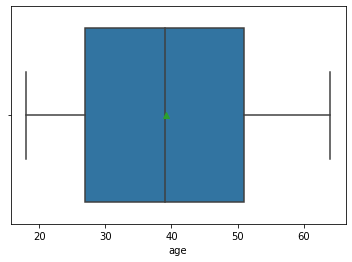

In [111]:
sns.boxplot(x = "age", data = insurance, showmeans = True);
plt.savefig("age.png")

- There are no outliers in the dataset
- Average age of the dataset is around 39

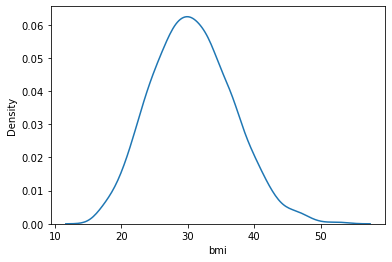

In [112]:
sns.distplot(insurance.bmi, hist = False);
plt.savefig("bmi.png")

- BMI in the given sample follow Normal Distribution

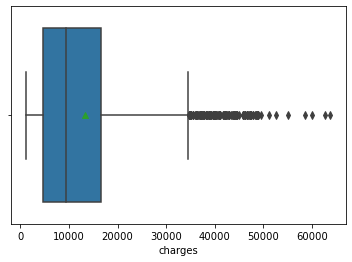

In [17]:
sns.boxplot(x = "charges", data = insurance, showmeans = True);
plt.savefig("medicalbills.png")

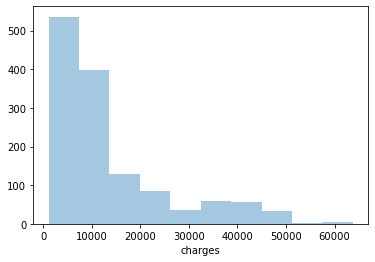

In [113]:
sns.distplot(insurance.charges, bins = 10, kde = False);
plt.savefig("charges.png")

- The distribution of medical charges is right skewed

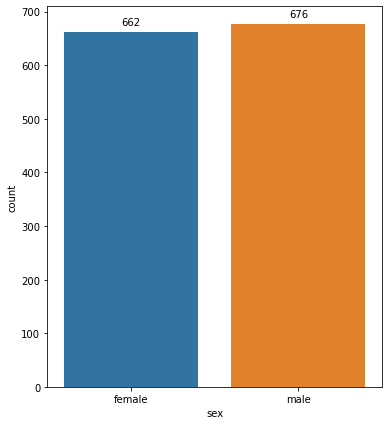

In [13]:
plt.figure(figsize=(6,7))
ax = sns.countplot(x= "sex", data = insurance)
plt.savefig("sex.png")
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width()/2.,p.get_height()),ha = 'center', va = 'center',xytext = (0,10), textcoords = 'offset points')
    #annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
plt.show();


- There are more Males than Females in the dataset

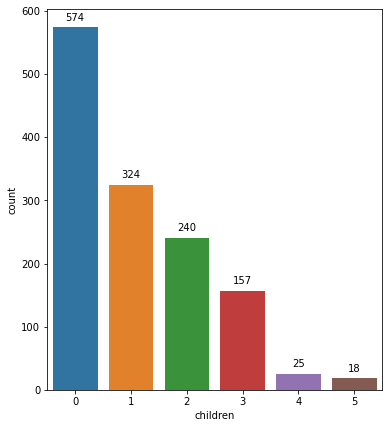

<Figure size 432x288 with 0 Axes>

In [18]:
plt.figure(figsize=(6,7))
ax = sns.countplot(x= "children", data = insurance)
plt.savefig("children.png")
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width()/2.,p.get_height()),ha = 'center', va = 'center',xytext = (0,10), textcoords = 'offset points')
plt.show()
plt.savefig("gender.png")

- There is more population with 0 children in the given dataset

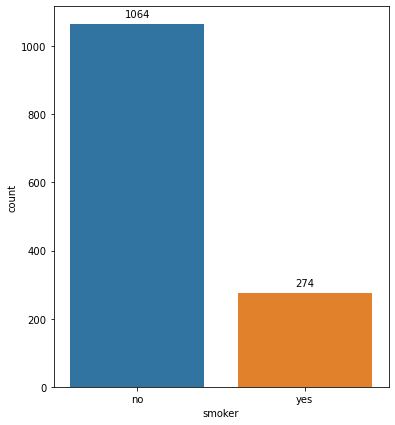

In [22]:
plt.figure(figsize=(6,7))
ax = sns.countplot(x= "smoker", data = insurance)
plt.savefig("smoker.png")
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width()/2.,p.get_height()),ha = 'center', va = 'center',xytext = (0,10), textcoords = 'offset points')
plt.show()

- Majority of population in the dataset are non smokers.

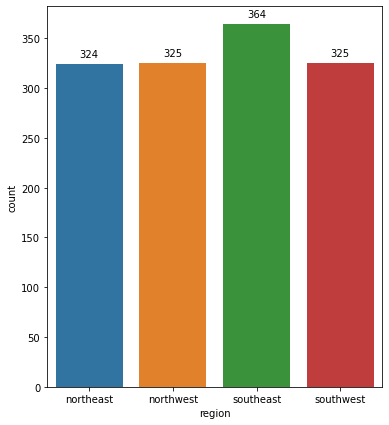

In [20]:
plt.figure(figsize=(6,7))
ax = sns.countplot(x= "region", data = insurance)
plt.savefig("region.png")
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width()/2.,p.get_height()),ha = 'center', va = 'center',xytext = (0,10), textcoords = 'offset points')
plt.show()


- There are almost similar number of samples from each region

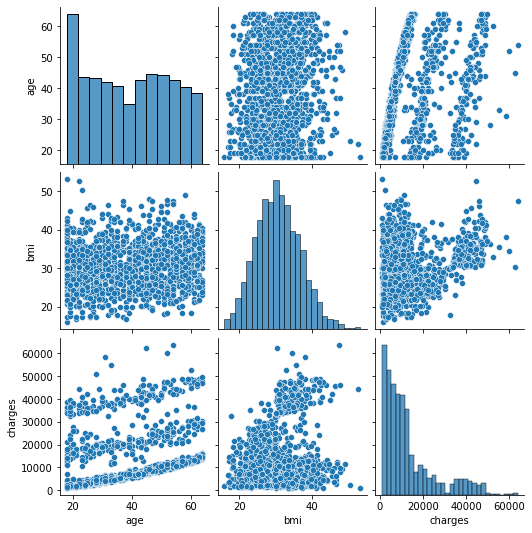

In [24]:
sns.pairplot(insurance)

## Exploratory Data Analysis
Exploring how medical claims are billed based on different parameters

(121.87390000000005, 63770.42801)

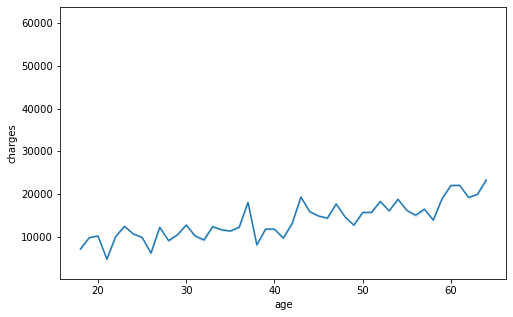

In [38]:
plt.figure(figsize = (8,5))
sns.lineplot(x = "age", y ="charges", data = insurance, ci = False);
plt.savefig("agevscharges.png")
plt.ylim(insurance["charges"].min()-1000,insurance["charges"].max(),10000)

- There is clearly an increasing trend which suggests medical charges billed are higher as Age is increasing
- Age and charges are linearly dependent

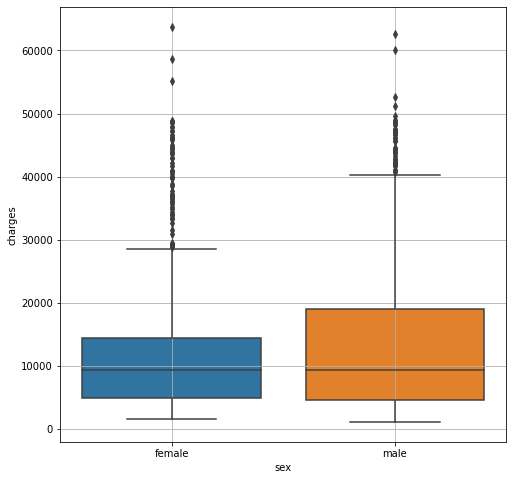

In [26]:
plt.figure(figsize = (8,8))
sns.boxplot(x = "sex", y = "charges", data = insurance)
plt.grid();
plt.savefig("gendervscharges.png")

- There are more outliers for medical bills for Female when compared to males.
- The range of medical charges billed by females is greater than that of males

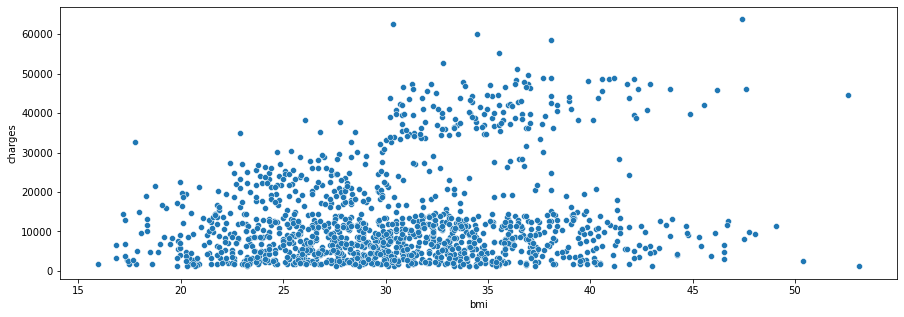

In [32]:
plt.figure(figsize = (15,5))
sns.scatterplot(x = "bmi", y = "charges", data = insurance, ci = False);
plt.savefig("chargesvsbmi.png")
plt.xticks(np.arange(15,55,5))
plt.show()

- There is no clear trend between bmi and medical bills charged
- Medical charges billed to insurance is less for peope with BMI less than 24.9 (ideal)

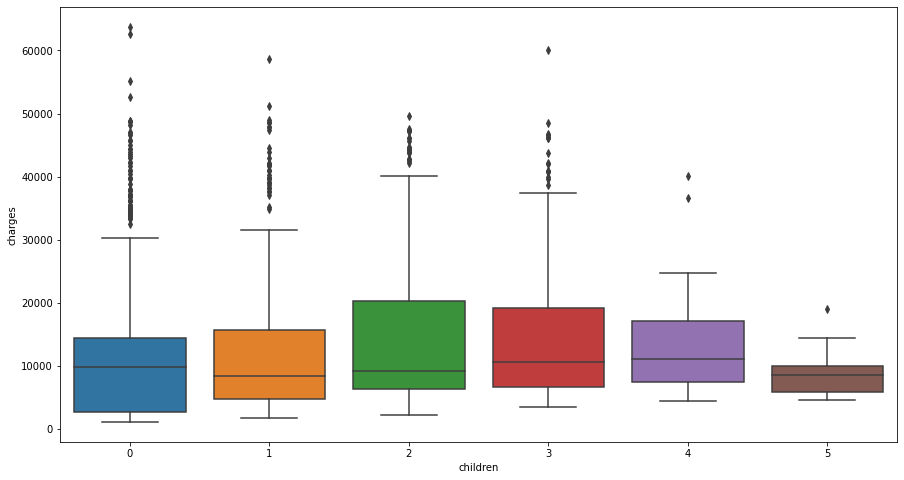

In [44]:
plt.figure(figsize = (15,8))
sns.boxplot(x= "children", y = "charges", data = insurance);

- There are many outliers for medical bills claimed with no children in the dataset
- Medical bills charged to insurance in very low for people with 5 children

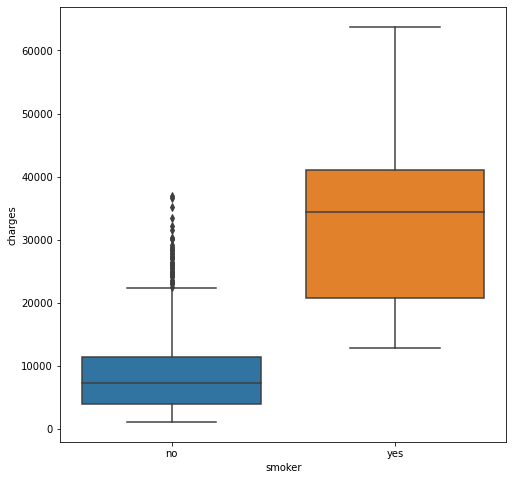

In [35]:
plt.figure(figsize = (8,8))
sns.boxplot(x = "smoker", y = "charges", data = insurance);
plt.savefig("smokervscharges.png")
plt.show()

- Medical bills claimed by smokers is very high, lowest being greater than 75% of that of non smokers

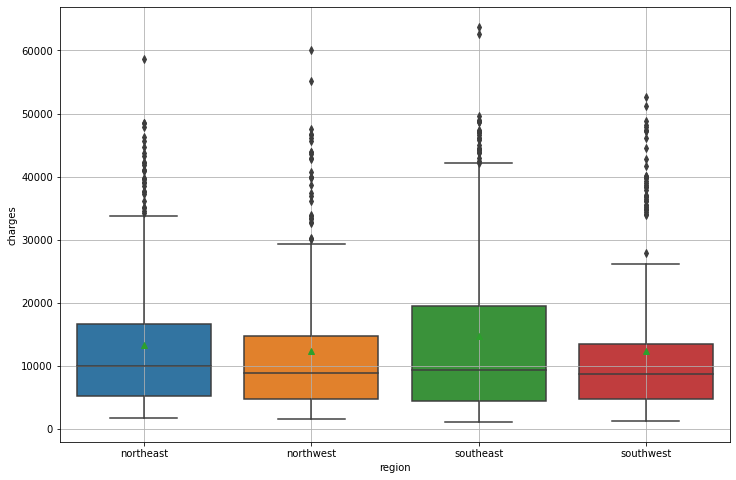

In [39]:
plt.figure(figsize = (12,8))
sns.boxplot(x = "region", y = "charges", data = insurance, showmeans = True)
plt.grid();
plt.savefig("chargesvsregion.png")

- The outliers in southeast region are less compared to that of other regions

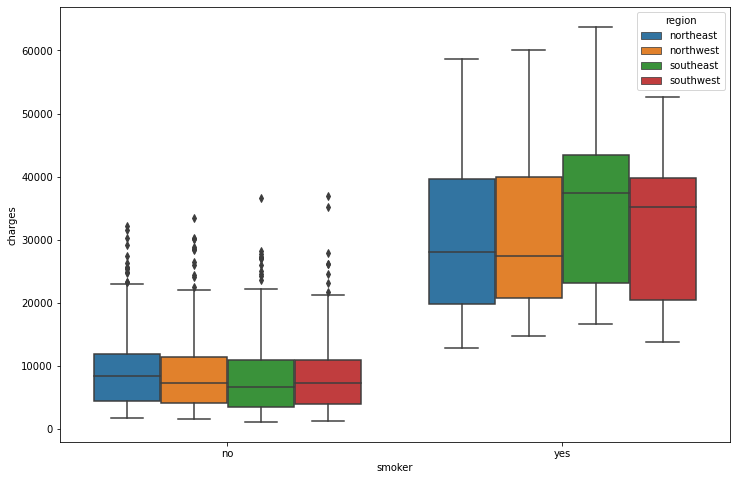

In [36]:
plt.figure(figsize = (12,8))
sns.boxplot(x = "smoker", y = "charges", data = insurance, hue = "region" );
plt.savefig("smokervschargesvsregion.png")

- The medical costs billed to health insurance is very high for smokers compared to non-smokers
- Specifically is southeast region the charges are very high for smokers

#### Understanding the effect of BMI different features

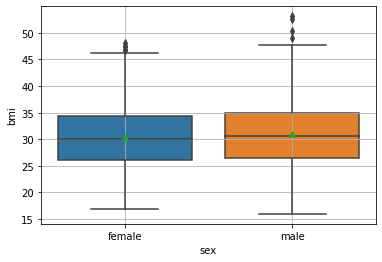

In [41]:
sns.boxplot(x = "sex", y = "bmi", data = insurance, showmeans = True);
plt.grid()

- There are more outliers for males in bmi
- The average BMI of males is higher than that of Females

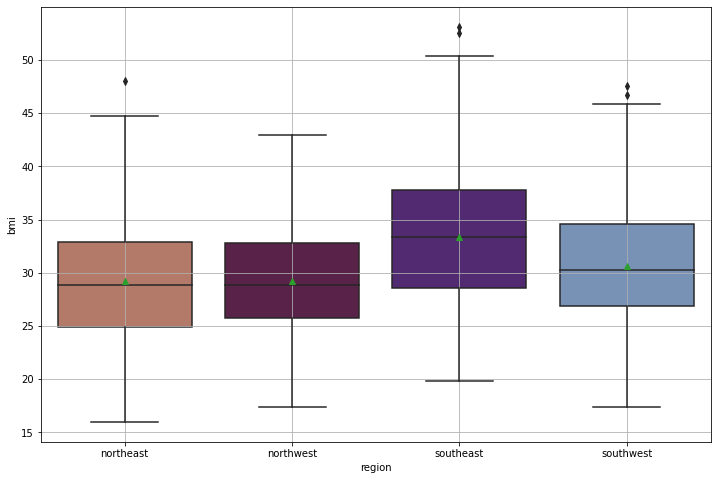

In [47]:
plt.figure(figsize = (12,8))
sns.boxplot(x = "region", y = "bmi", data = insurance, showmeans = True, palette = "twilight_r");
plt.grid()

- BMI of northeast and northwest is similar.
- BMI of people from southeast are high compared to other regions

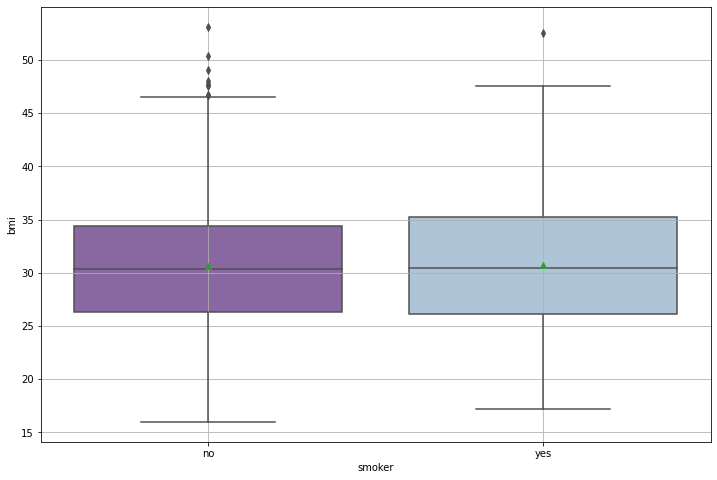

In [101]:
plt.figure(figsize = (12,8))
sns.boxplot(x = "smoker", y = "bmi", data = insurance, showmeans = True, palette = "BuPu_r");
plt.grid()

- BMI of smokers is little higher than non smokers but there are more outliers for non smokers

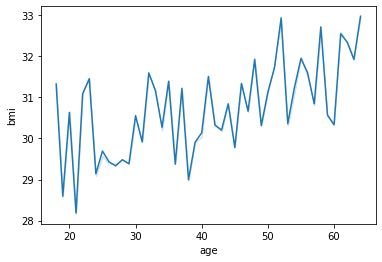

In [105]:
sns.lineplot(x ="age", y = "bmi", data = insurance, ci = False);

- There is a linear relationship between age and bmi

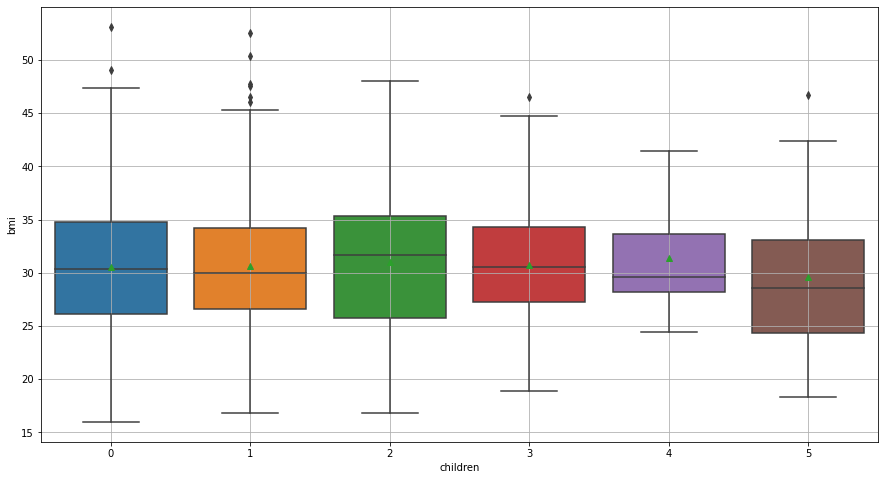

In [106]:
plt.figure(figsize = (15,8))
sns.boxplot(x= "children", y = "bmi", data = insurance, showmeans = True)
plt.grid();

- BMI of customers with no children has a wide range

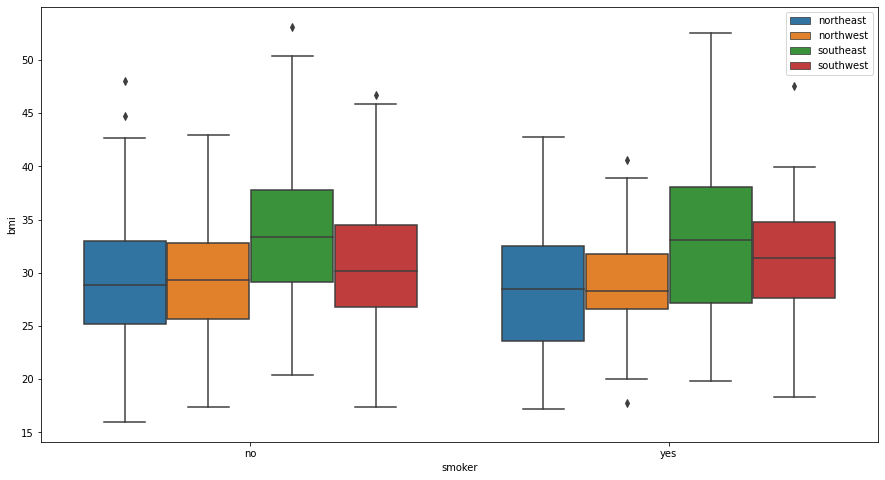

In [76]:
plt.figure(figsize = (15,8))
sns.boxplot(x= "smoker", y = "bmi", hue = "region", data = insurance)
plt.legend(bbox_to_anchor=(1.00, 1));
plt.savefig("smokerbmivsregion.png")

- BMI of people from southeast region are higher irrespective of their smoking habit

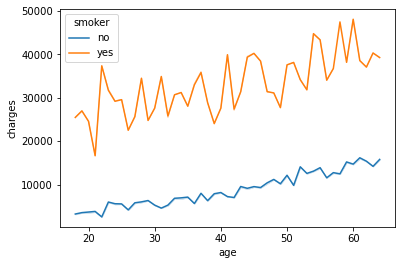

In [75]:
sns.lineplot(x= "age", y = "charges", hue = "smoker", data = insurance, ci = False);
plt.savefig("agechargesvssmoker.png")

 - There is a clear indication though medical charges billed to insurance increases with age, the charges are very high for smokers

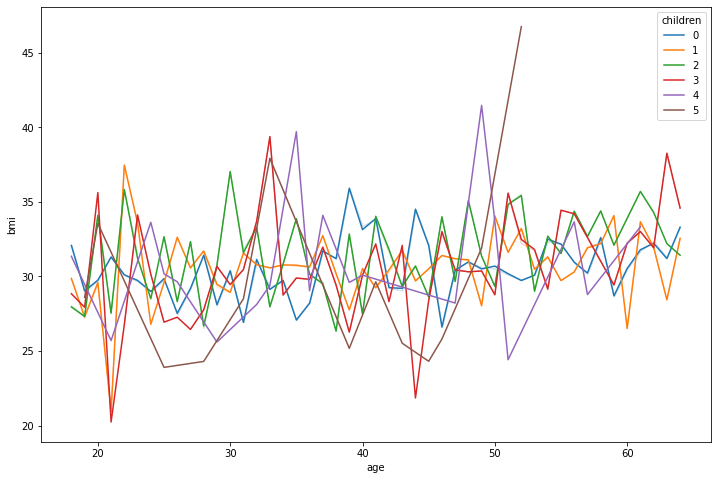

In [10]:
plt.figure(figsize = (12,8))
sns.lineplot(x= "age", y = "bmi", hue = "children", data = insurance, ci = False);

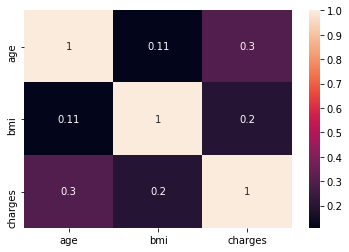

In [12]:
sns.heatmap(insurance.corr(), annot = True);

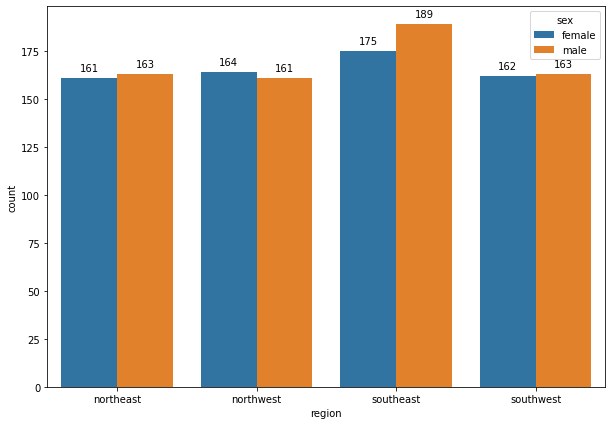

In [97]:
plt.figure(figsize=(10,7))
ax = sns.countplot(x= "region",hue = "sex", data = insurance)
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width()/2.,p.get_height()),ha = 'center', va = 'center',xytext = (0,10), textcoords = 'offset points')
plt.show()

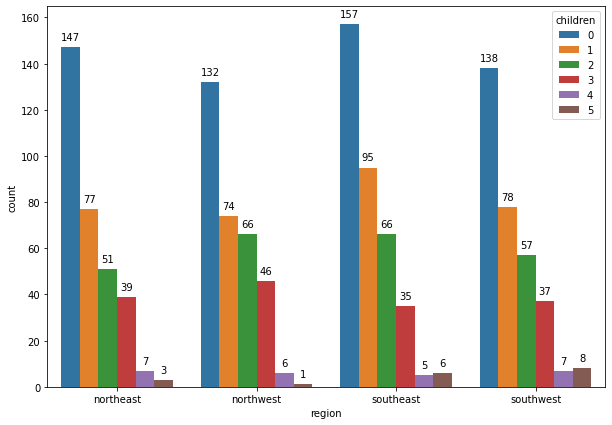

In [108]:
plt.figure(figsize=(10,7))
ax = sns.countplot(x= "region",hue = "children", data = insurance)
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width()/2.,p.get_height()),ha = 'center', va = 'center',xytext = (0,10), textcoords = 'offset points')
plt.show()

- There are very less number of customers with 4 and 5 children in the dataset.
- Majority of customers in the dataset have no children

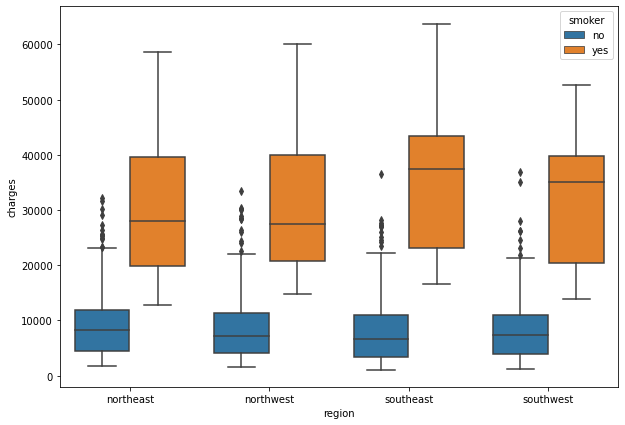

In [18]:
plt.figure(figsize=(10,7))
sns.boxplot(x = "region", y = "charges", hue = "smoker", data = insurance);

- The medical bills charged to insurance is higher from southeast and southwest smokers

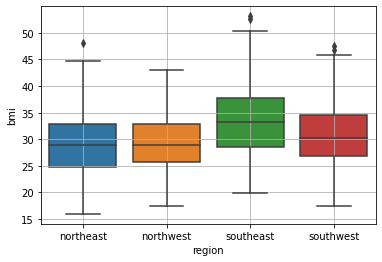

In [32]:
sns.boxplot(x = "region", y = "bmi", data = insurance);
plt.grid()

- BMI of southeast insurers is higher in the given dataset

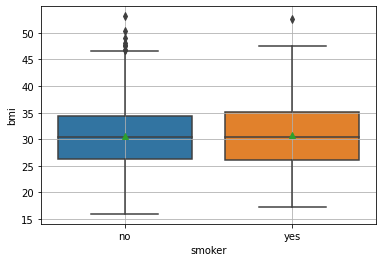

In [33]:
sns.boxplot(x = "smoker", y ="bmi", data = insurance, showmeans = True);
plt.grid()

- BMI of non smokers in the given dataset is higher

## Prove (or disprove) that the medical claims made by the people who smoke is greater than those who don't?

### Structuring of data to perform Hypothesis Testing

In [34]:
smokers_yes = insurance[insurance["smoker"] == "yes"]

In [36]:
smokers_yes.shape

(274, 7)

In [38]:
smokers_no = insurance[insurance["smoker"] == "no"]

In [39]:
smokers_no.shape

(1064, 7)

### Hypothesis Formulation:
Use T-Test unpaired - One Tail Test
- H$_0$: The means of medical charges of smokers is less than or equal to means of non-smokers $\mu_{smokers} <= \mu_{nonsmokers}$
- H$_a$: The means of medical charges of smokers is greater than means of non-smokers $\mu_{smokers} > \mu_{nonsmokers}$

### Confidence Interval

$\alpha$ = 0.05 (95%)

### Test Identification
Use Independent T Test: One tail

### Test statistic and P value calculation

In [42]:
t, p_twotailed = stats.ttest_ind(smokers_no["charges"],smokers_yes["charges"])# Output P value is always for two tailed test
#we divide the p value by 2 as we are performing a one tail test
print("tstats = ",t, ", p_twotailed = ", p_twotailed, ", p_onetailed =", p_twotailed/2)

tstats =  -46.664921172723716 , p_twotailed =  8.271435842177219e-283 , p_onetailed = 4.1357179210886093e-283


### Decide to Reject or Not Reject Null Hypothesis
Since p-value is very less than 0.05, we reject the Null Hypothesis.
The hypothesis that medical claims of smokers is greater than medical claims of non smokers 

## Prove (or disprove) with statistical evidence that the BMI of females is different from that of males.

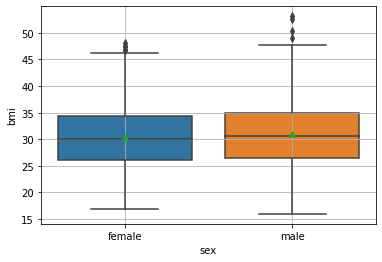

In [40]:
sns.boxplot(x = "sex", y = "bmi", data = insurance, showmeans = True)
plt.grid();
plt.savefig("bmivsgender.png")

- Range of BMI of males has wider range than that of females
- The outliers for BMI in males are higher
- From the boxplot we can observe that median and mean are very close but not same

### Structuring data required to test Hypothesis

In [23]:
male = insurance[insurance["sex"] == "male"]

In [24]:
male.shape

(676, 7)

In [25]:
female = insurance[insurance["sex"] == "female"]

In [26]:
female.shape

(662, 7)

### Hypothesis Formulation
* H<sub>0</sub>: x&#772;<sub>male</sub> = x&#772;<sub>female</sub>, or x&#772;<sub>female</sub> - x&#772;<sub>male</sub> = 0, There is no difference between the means of BMI
* H<sub>A</sub>: x&#772;<sub>female</sub> <> x&#772;<sub>male</sub>, or x&#772;<sub>female</sub> - x&#772;<sub>male</sub> <> 0, There is difference between the means of BMI

### Confidence Interval
$\alpha$ = 0.05 (95%)

### Test identification
In this case we are performing a T-test on independent samples.
As we are trying to prove the equality or inequality of means we perform a two-tailed test

### Test statistic and p-value calculation

In [28]:
t, p_twotailed = stats.ttest_ind(male["bmi"],female["bmi"])# Output P value is always for two tailed test
#we divide the p value by 2 as we are performing a one tail test
print("tstats = ",t, ", p_twotailed = ", p_twotailed)

tstats =  1.696752635752224 , p_twotailed =  0.08997637178984932


### Decide to Reject or Fail to Reject Null Hypothesis

Since p-value in this case is 0.08 which is greater than 0.05, we fail to reject null Hypothesis which implies the BMI of males is same as BMI of females

## Is the proportion of smokers significantly different across different regions?

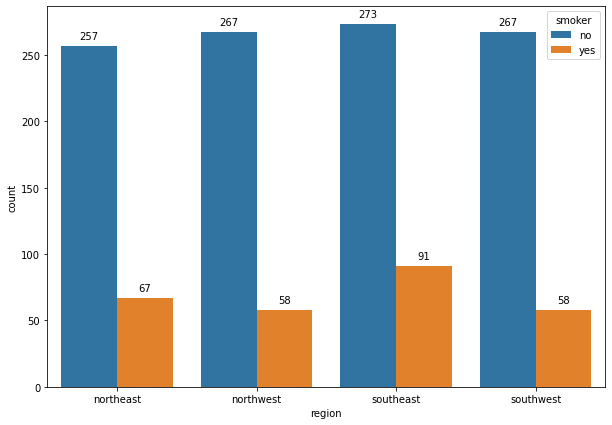

In [41]:
plt.figure(figsize=(10,7))
ax = sns.countplot(x= "region",hue = "smoker", data = insurance)
plt.savefig("smokersregions.png")
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width()/2.,p.get_height()),ha = 'center', va = 'center',xytext = (0,10), textcoords = 'offset points')
plt.show()

- There are significantly more number of smokers in southeast region compared to other regions
- The population has equal number of smokers and non smokers in northwest and southwest regions

### Creating contingency table to perform chi-squared test

In [69]:
contingency = pd.crosstab(insurance["smoker"],insurance["region"])
contingency

region,northeast,northwest,southeast,southwest
smoker,,,,
no,257,267,273,267
yes,67,58,91,58


### Hypothesis Formulation
* H$_0$: The proportions of smokers is same across regions
* H<sub>A</sub>: The proprtions of smokers is significantly different across regions

### Confidence Interval
$\alpha$ = 0.05 (95%)

### Identifying Test statistic
A chi squared test is performed to identify the significant difference of smokers and non smokers across regions

### Test statistc and p-value calculation

In [70]:
c, p, dof, expected = chi2_contingency(contingency)
print("tstats = ",c, ", p value = ", p, ", degrees of freedom = ",dof, ", expected frequency = ", expected)

tstats =  7.34347776140707 , p value =  0.06171954839170547 , degrees of freedom =  3 , expected frequency =  [[257.65022422 258.44544096 289.45889387 258.44544096]
 [ 66.34977578  66.55455904  74.54110613  66.55455904]]


### Decide to reject or fail to reject null Hypothesis
In this case since p value is 0.06 which is greater than 0.05 we fail to reject null hypothesis.
The proprtion of smokers and non smokers is same across regions

In [72]:
children_insurance = insurance[(insurance["sex"]=="female") & (insurance.children.isin([0,1,2]))]
children_insurance.shape

children_insurance.describe (include = "category")

,sex,children,smoker,region
count,566,566,566,566
unique,1,3,2,4
top,female,0,no,southeast
freq,566,289,466,151


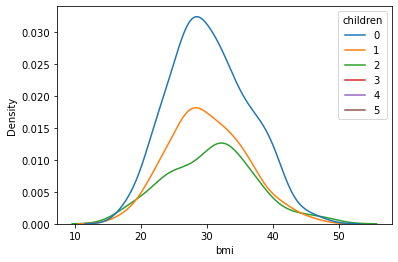

In [80]:
sns.kdeplot(x= "bmi", data = children_insurance, hue = "children");
plt.savefig("bmichildkde.png")

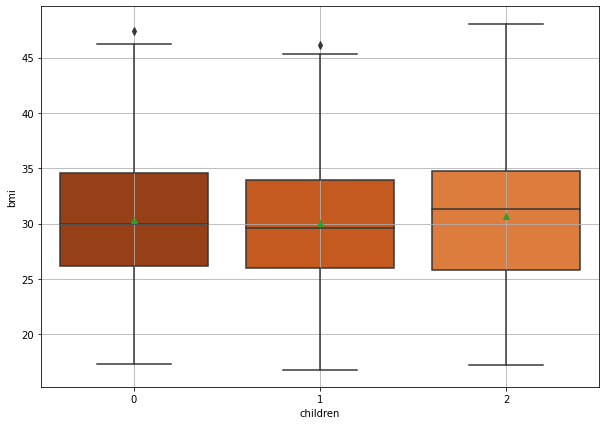

In [79]:
plt.figure(figsize=(10,7))
children_insurance = insurance[(insurance["sex"]=="female") & (insurance.children.isin([0,1,2]))]
sns.boxplot(x= "children", y = "bmi", data = children_insurance,showmeans = True,palette = "Oranges_r")
plt.grid()
plt.xlim(-0.5,2.5)
plt.savefig("bmichildren.png")

## Is the mean BMI of women with no children, one child, and two children the same? Explain your answer with statistical evidence.

### Structuring data required to test Hypothesis

In [65]:
women_nochild = insurance[(insurance["sex"]=="female") & (insurance["children"] == 0)]
women_nochild.shape

(289, 7)

In [66]:
women_1child = insurance[(insurance["sex"]=="female") & (insurance["children"] == 1)]
women_1child.shape

(158, 7)

In [67]:
women_2child = insurance[(insurance["sex"]=="female") & (insurance["children"] == 2)]
women_2child.shape

(119, 7)

### Hypothesis Formulation
* H<sub>0</sub>: x&#772;<sub>0</sub> = x&#772;<sub>1</sub>=x&#772;<sub>2</sub>; x&#772; is the mean of BMI 
* H<sub>A</sub>: Means are not equal

### Confidence Interval
$\alpha$ = 0.05 (95%)

### Test identification
In this case we are performing a one way ANOVA.
The ANOVA procedure is used to compare the means of the comparison groups

### Test statistic and p-value calculation 

In [70]:
stats.f_oneway(women_nochild["bmi"],women_1child["bmi"],women_2child["bmi"])

F_onewayResult(statistic=0.3344720147757968, pvalue=0.7158579926754841)

### Decide to reject or fail to reject null Hypothesis
Since p value is 0.7 which is greater than 0.05 so we fail to reject null hypothesis. There is no enough evidence to prove statistically that means of BMI of women with no children, 1 child and 2 children are not same

## Conclusion
- The age of the customer is proportionate to both BMI and medicl costs billed to insurance.
- The population of customers from southeast region are more in number in the given sampel than other regions.
- Medical costs billed are higher for smokers when compared to non smokers. There are 91 smokers in the given population from southeast region where the medical costs charged to insurance are also higher.
- BMI of males and females are same which was proved with statistical evidence.
- BMI of women with no children is very high in the sample